# Import

In [84]:
import numpy as np
import pandas as pd

In [85]:
path = 'chat_pp_sample.csv'

# Dataframe setup

In [86]:
df = pd.read_csv(path, index_col=0)

In [87]:
with open(path, 'r') as file :
  data = file.readlines()

#import pandas as pd

In [88]:
!pip3 install matplotlib
!pip3 install seaborn

## Date vs Count

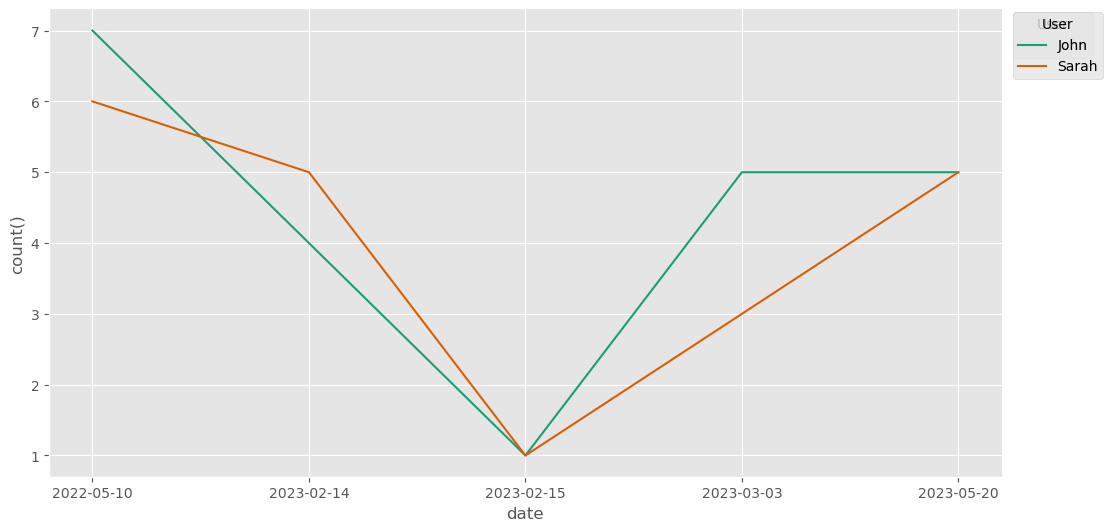

In [89]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='User', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

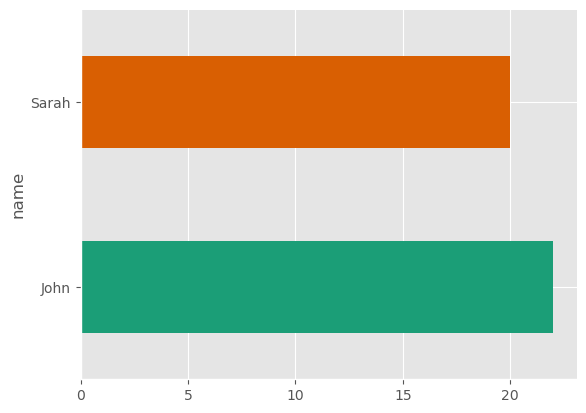

In [90]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Distribution of message over time

In [91]:
# Convert 'date' column to datetime
#df['datetime'] = pd.to_datetime(df['date'], format='mixed')
df['datetime'] = pd.to_datetime(df['date'])

In [93]:
# Save image file:
plt.savefig("ribution of Messages Sent Over relationship.jpg") 


<Figure size 640x480 with 0 Axes>

In [94]:
!pip install textblob

In [ ]:
df.drop(columns=['import'], inplace=True)

In [117]:

newdf=df
newdf.head(4)


,date,time,name,message_text,datetime
0,2022-05-10,08:30 p.m.,John,"Hey love, just wanted to let you know that you...",2022-05-10
1,2022-05-10,08:31 p.m.,Sarah,"Aww, you always know how to make my heart flut...",2022-05-10
2,2022-05-10,08:32 p.m.,John,"I miss you too, darling. Every moment without ...",2022-05-10
3,2022-05-10,08:33 p.m.,Sarah,Remember when we watched the stars together la...,2022-05-10


In [118]:
from collections import Counter
import matplotlib.pyplot as plt


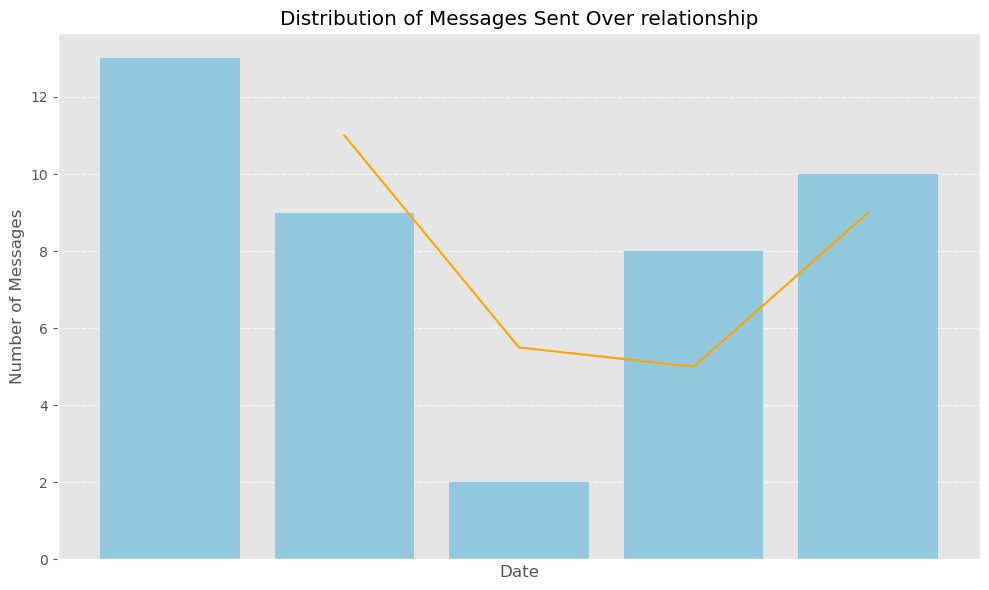

In [119]:
message_count = df.groupby('date').size()
moving_average_30d = message_count.rolling(window=2).mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=message_count.index, y=message_count.values, color='skyblue')
plt.plot(moving_average_30d.index, moving_average_30d.values, color='orange', label='Moving Average (30-day)')
plt.title('Distribution of Messages Sent Over relationship')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks([])  # Hide x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Distribution of the Message.jpg")
plt.show()

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
#newdf=newdf.apply(lambda x: x.lower().split())
#newdf=newdf.drop(columns=['import'])
print(newdf)

          date        time   name  \
0   2022-05-10  08:30 p.m.   John   
1   2022-05-10  08:31 p.m.  Sarah   
2   2022-05-10  08:32 p.m.   John   
3   2022-05-10  08:33 p.m.  Sarah   
4   2022-05-10  08:34 p.m.   John   
5   2022-05-10  08:35 p.m.  Sarah   
6   2022-05-10  08:36 p.m.   John   
7   2022-05-10  08:37 p.m.  Sarah   
8   2022-05-10  08:38 p.m.   John   
9   2022-05-10  08:39 p.m.  Sarah   
10  2022-05-10  08:40 p.m.   John   
11  2022-05-10  08:41 p.m.  Sarah   
12  2022-05-10  08:42 p.m.   John   
13  2023-02-14  10:00 a.m.  Sarah   
14  2023-02-14  10:05 a.m.   John   
15  2023-02-14  10:10 a.m.  Sarah   
16  2023-02-14  10:15 a.m.   John   
17  2023-02-14  10:20 a.m.  Sarah   
18  2023-02-14  07:00 p.m.   John   
19  2023-02-14  07:05 p.m.  Sarah   
20  2023-02-14  11:30 p.m.  Sarah   
21  2023-02-14  11:35 p.m.   John   
22  2023-02-15  08:00 a.m.   John   
23  2023-02-15  08:10 a.m.  Sarah   
24  2023-03-03  05:00 p.m.   John   
25  2023-03-03  05:10 p.m.  Sarah   
2

In [ ]:
#vectorizer=TfidfVectorizer(max_features=2000)
#features=vectorizer.fit_transform(newdf)
#X_train, X_test, y_train, y_test= train_test_split(features, test_size=0.2, random_state=123)


In [121]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import ne_chunk, pos_tag, word_tokenize
from tqdm.notebook import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer


#text=' '.join(newdf['message_text'])
#text=nltk.word_tokenize(newdf['message_text'])
#blob=TextBlob(text)
#sentiment=blob.sentiment
#print(sentiment)
#Sentiment(polarity=0.3482815557729941, subjectivity=0.593085453359426)
#sentiments=[TextBlob(doc).sentiment.polarity for doc in newdf]
#sentiment_counts=Counter(sentiments)
#print(sentiments)
#sentiments_labels=sentiment_counts.keys()
#print(sentiments_labels)
#sentiment_values=sentiment_counts.values()
#tempt=sentiment_values
#plt.pie(tempt,labels=sentiments_labels, autopct="%1.1f%%")
#plt.title("Sentiment Distribution")
#plt.show()

[nltk_data] Downloading package punkt to /Users/razy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/razy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/razy/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/razy/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [122]:
text=''.join(newdf['message_text'])
blob=TextBlob(text)
sentiment=blob.sentiment
print(sentiment)

Sentiment(polarity=0.3207223567393058, subjectivity=0.5846650524616627)


In [124]:
print(text)

Hey love, just wanted to let you know that you are on my mind constantly.Aww, you always know how to make my heart flutter! I miss you so much.I miss you too, darling. Every moment without you feels incomplete.Remember when we watched the stars together last summer? It was magical.Yes, I will never forget that night. It felt like the universe was conspiring to bring us closer.I wish we could relive that moment every day. It was pure bliss being in your arms.Me too, my love. But even when we're apart, you're always in my heart.You're my rock, John. Knowing you're there for me makes everything seem possible.And you're my guiding light, Sarah. With you by my side, I feel invincible.Let's promise to always support and cherish each other, no matter what life throws our way.I promise, my love. Together, we can conquer anything.Forever and always.Forever and always.Good morning sunshine! Happy Valentine's Day to the most amazing boyfriend a girl could ask for.Good morning beautiful! Woke up t

In [125]:
#tokenized_text=[]
#for text in newdf['message_text']:
 #   tokk=nltk.word_tokenize(text)
  #  tokenized_text.append(tokk)
#print(tokenized_text)
# Tokens is a function to tokenize the text
def Tokens(text):
    return nltk.word_tokenize(text)
#tokens=nltk.word_tokenize(text)
tokens=Tokens(text)
#print(tokens)

In [126]:
# Tag function tagged works together with same properties like noun, verbs, etc
def Tag(tokens):
    return nltk.pos_tag(tokens)
#tagged=nltk.pos_tag(tokens)
tagged=Tag(tokens)
print(tagged[:10])

[('Hey', 'NNP'), ('love', 'VBP'), (',', ','), ('just', 'RB'), ('wanted', 'VBN'), ('to', 'TO'), ('let', 'VB'), ('you', 'PRP'), ('know', 'VB'), ('that', 'IN')]


In [ ]:
# Entities= Group them to a chuk of text
def Grouptag(tagged):
    return nltk.ne_chunk(tagged)
entities=Grouptag(tagged)
print(entities)

In [ ]:
# Vader= Valence Aware Dictionary and #sEntiment Reasoner
# positive, negative, neutral= it is not good for human relatonship!


In [ ]:
import nltk
!pip install tqdm
import tqdm
import time
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
#print(newdf['import'])
result=sia.polarity_scores(text)
print(result)

In [ ]:
#print(newdf.head(3))
#res={}
#for i, row in tqdm.(newdf.iterrows(), total=len(newdf)):
  #  text=row['import']

#frq= I love you, love, baby, index save in a list
# write in function input=datF, token, output= id or indecies




In [132]:
token=['love','I miss you', 'baby', 'babe','honey','I love you', 'darling','soulmate']
#indecies=newdf[newdf['message_text'].str.contains(tokenn)].index
#print(indecies)
def milestone(newdf,token):
    #for tt in toekns
    return newdf[newdf['message_text'].str.contains(tokenn)].index
#print(newdf.head(10))
indecies=milestone(newdf,tokenn)
print(indecies)

Int64Index([0, 6, 10, 23, 24, 29], dtype='int64')


In [139]:
token_index=dict()
for tok in token:
    token_index[tok]=(newdf[newdf['message_text'].str.contains(tok)].index.tolist())
#print(token_index)

In [140]:
token_index

{'love': [0, 6, 10, 23, 24, 29],
 'I miss you': [1, 2],
 'baby': [],
 'babe': [],
 'honey': [],
 'I love you': [],
 'darling': [2],
 'soulmate': []}

In [141]:
#Vader= Bag od words, Robert pretrained model, Huggingface pipeline
#plt.style.use('ggplot')
from collections import defaultdict

In [143]:
# scoring positive messages
sia=SentimentIntensityAnalyzer()
#sia.polarity_scores(newdf[0])
def positiveResponse(indecies, df):
    #maxEmotion=defaultdict(list)
    maxval=-2222
    maxindex=-1111
    for idx in indecies:
        message=newdf['message_text'][idx]
        #sia.polarity_scores(message)
        blob1=TextBlob(message)
        res=blob1.sentiment.polarity
        if res>maxval:
            maxindex=idx
            maxval=max(maxval, res)
            #maxEmotion[idx]=message
    loc_index=maxindex
    context_size=5
    context_df=df.iloc[max(0,loc_index-context_size):min(len(df),loc_index+context_size+1)]
    for i in indecies:
        if i==maxindex:
            continue
        else:
            context_df=context_df.append(df.iloc[i], ignore_index=True)
            #context_df=df.iloc[i]  # append
    context_df.reset_index(drop=True, inplace=True)
    return context_df

In [154]:
for index, row in newdf.iterrows():
    blob=TextBlob(row['message_text'])
    polarity =blob.sentiment.polarity
    subjectivity =blob.sentiment.subjectivity
    #print(polarity, subjectivity)
    newdf.at[index, 'polarity']=polarity
    newdf.at[index, 'subjectivity']=subjectivity


In [156]:
newdf.head()

,date,time,name,message_text,datetime,polarity,subjectivity
0,2022-05-10,08:30 p.m.,John,"Hey love, just wanted to let you know that you...",2022-05-10,0.2500,0.466667
1,2022-05-10,08:31 p.m.,Sarah,"Aww, you always know how to make my heart flut...",2022-05-10,0.2875,0.550000
2,2022-05-10,08:32 p.m.,John,"I miss you too, darling. Every moment without ...",2022-05-10,0.0000,0.000000
3,2022-05-10,08:33 p.m.,Sarah,Remember when we watched the stars together la...,2022-05-10,0.2500,0.533333
4,2022-05-10,08:34 p.m.,John,"Yes, I will never forget that night. It felt l...",2022-05-10,0.0000,0.000000


In [158]:
newdf.sort_values(by=['polarity'], ascending=False).head(5)

,date,time,name,message_text,datetime,polarity,subjectivity
14,2023-02-14,10:05 a.m.,John,Good morning beautiful! Woke up thinking about...,2023-02-14,0.85000,0.80
22,2023-02-15,08:00 a.m.,John,Good morning again beautiful. Still can't stop...,2023-02-15,0.77500,0.80
21,2023-02-14,11:35 p.m.,John,Seeing the smile on your face was the best par...,2023-02-14,0.70000,0.50
13,2023-02-14,10:00 a.m.,Sarah,Good morning sunshine! Happy Valentine's Day t...,2023-02-14,0.69375,0.75
23,2023-02-15,08:10 a.m.,Sarah,Good morning to you too! Waking up feeling hap...,2023-02-15,0.64375,0.65


In [162]:
subjectivyty_df=newdf.sort_values(by=['subjectivity'], ascending=False).head(5)

In [164]:
# subjectivity coniversation bulding:
subjectivity_dict={}
for i, row in subjectivyty_df.iterrows():
    subjectivity_dict[i]=newdf[row]['message_text']

7
33
20
30
22


In [165]:
cdf=positiveResponse(indecies, newdf)
print(cdf)

          date        time   name  \
0   2023-02-14  07:00 p.m.   John   
1   2023-02-14  07:05 p.m.  Sarah   
2   2023-02-14  11:30 p.m.  Sarah   
3   2023-02-14  11:35 p.m.   John   
4   2023-02-15  08:00 a.m.   John   
5   2023-02-15  08:10 a.m.  Sarah   
6   2023-03-03  05:00 p.m.   John   
7   2023-03-03  05:10 p.m.  Sarah   
8   2023-03-03  05:15 p.m.   John   
9   2023-03-03  05:20 p.m.  Sarah   
10  2023-03-03  05:25 p.m.   John   
11  2022-05-10  08:30 p.m.   John   
12  2022-05-10  08:36 p.m.   John   
13  2022-05-10  08:40 p.m.   John   
14  2023-03-03  05:00 p.m.   John   
15  2023-03-03  09:00 p.m.   John   

                                         message_text   datetime  polarity  \
0   Hey beautiful, I'm just outside your door. Ope... 2023-02-14  0.283333   
1                        (blushing emoji)  On my way! 2023-02-14  0.000000   
2   Wow, John, that was incredible! Thank you for ... 2023-02-14  0.400000   
3   Seeing the smile on your face was the best par... 2023

/var/folders/s6/tts4jbdd5qg8h_b0hhypf8ww0000gn/T/ipykernel_1278/3306074687.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  context_df=context_df.append(df.iloc[i], ignore_index=True)
